<a href="https://colab.research.google.com/github/takahiro2001kt/Cat-species-classification-using-CNN-and-VGG16/blob/main/%E6%9C%80%E7%B5%82%E8%AA%B2%E9%A1%8C_VGG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown --id 1cckthtg6covlRgIcTtjHq4vqEvMRJdaP -O cat_self.pickle # 猫の画像データ
!gdown --id 1eD8aIl5vWOvE8Q6TkfRU4h1lcJhjH8EZ -O val.zip # val画像データ

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1cckthtg6covlRgIcTtjHq4vqEvMRJdaP
To: /content/cat_self.pickle
100% 76.1M/76.1M [00:00<00:00, 248MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1eD8aIl5vWOvE8Q6TkfRU4h1lcJhjH8EZ
To: /content/val.zip
100% 221k/221k [00:00<00:00, 56.1MB/s]


In [ ]:
!unzip val.zip #val画像を解凍

Archive:  val.zip
   creating: val/
  inflating: val/American.jpg        
  inflating: __MACOSX/val/._American.jpg  
  inflating: val/.DS_Store           
  inflating: __MACOSX/val/._.DS_Store  
  inflating: val/Persian.jpg         
  inflating: __MACOSX/val/._Persian.jpg  
  inflating: val/Scottish.jpg        
  inflating: __MACOSX/val/._Scottish.jpg  
  inflating: val/Munchikan.jpg       
  inflating: __MACOSX/val/._Munchikan.jpg  


In [ ]:
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import tensorflow as tf
import pandas as pd
from PIL import Image
import cv2

num_classes = 4
im_rows = 128
im_cols = 128
im_color = 3
in_shape = (im_rows, im_cols, im_color)

In [ ]:
# データを読み込む --- (*1)
data_file =  "/content/cat_self.pickle"
data = pickle.load(open(data_file,"rb"))

In [ ]:
# データをimageとlabelに分けつつ保存
X = []
y = []
for d in data:
    (label,img)=d 

    y.append(label)
    X.append(img)

X = np.array(X)
y = np.array(y)

# train dataとtest dataに分類
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, train_size=0.8,shuffle=True)
# # データを正規化 --- (*2)

print(X_train.size)
print(y_train.size)


X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255


#One-Hot形式前のy_testを保存
y_test_org = y_test
# ラベルデータをOne-Hot形式に変換
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

60801024
1237


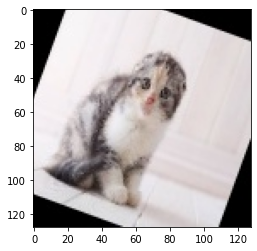

In [ ]:
#　正常に読み込めているか確認のため表示
resize_img = cv2.resize(img, (im_rows,im_cols))
im = Image.fromarray((X_train[20] * 255).astype(np.uint8))
src = cv2.cvtColor(resize_img, cv2.COLOR_BGR2RGB)
plt.imshow(src)
plt.show()

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

vgg_model = VGG16(weights = 'imagenet', #学習済みの重みを使用する
                   include_top = False, #出力層は使わない
                   input_shape = in_shape) #入力する画像サイズの指定

vgg_model.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                              

In [ ]:
# 全ての重みを固定（freeze）
for layer in vgg_model.layers[:19]:
  layer.trainable = False

# 重みが固定されているかの確認
for layer in vgg_model.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f5436ed9750> False
<keras.layers.convolutional.Conv2D object at 0x7f5434e28190> False
<keras.layers.convolutional.Conv2D object at 0x7f5434e43a90> False
<keras.layers.pooling.MaxPooling2D object at 0x7f5434578090> False
<keras.layers.convolutional.Conv2D object at 0x7f54205f6590> False
<keras.layers.convolutional.Conv2D object at 0x7f54205f3d90> False
<keras.layers.pooling.MaxPooling2D object at 0x7f54205fddd0> False
<keras.layers.convolutional.Conv2D object at 0x7f5420594350> False
<keras.layers.convolutional.Conv2D object at 0x7f5420595a90> False
<keras.layers.convolutional.Conv2D object at 0x7f5420597410> False
<keras.layers.pooling.MaxPooling2D object at 0x7f54205a1710> False
<keras.layers.convolutional.Conv2D object at 0x7f54205aaa10> False
<keras.layers.convolutional.Conv2D object at 0x7f54205a5ed0> False
<keras.layers.convolutional.Conv2D object at 0x7f54205af850> False
<keras.layers.pooling.MaxPooling2D object at 0x7f54205bbdd0>

In [ ]:
model = keras.Sequential()
# VGG16モデル
model.add(vgg_model)
# 層を追加
model.add(Conv2D(32, kernel_size=3, padding="same", activation="relu"))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation="relu")) 
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 conv2d (Conv2D)             (None, 4, 4, 32)          147488    
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 64)                32832     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0

In [ ]:
for layer in model.layers:
    print(layer, layer.trainable )

print(len(model.trainable_weights))

<keras.engine.functional.Functional object at 0x7f54205afd90> True
<keras.layers.convolutional.Conv2D object at 0x7f54205aa790> True
<keras.layers.core.flatten.Flatten object at 0x7f54205fdad0> True
<keras.layers.core.dense.Dense object at 0x7f54205ced10> True
<keras.layers.core.dropout.Dropout object at 0x7f542060f090> True
<keras.layers.core.dense.Dense object at 0x7f54200e8150> True
<keras.layers.core.dropout.Dropout object at 0x7f54200efb10> True
<keras.layers.core.dense.Dense object at 0x7f5420090050> True
8


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer= 'adam', metrics=['accuracy'])

# 学習の実施
log = model.fit(X_train, y_train, #学習用データ
                          steps_per_epoch = 10,
                          epochs = 100, #繰り返し計算する回数
                          callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss',#監視する値
                                       min_delta=0, #改善とみなされる最小の量
                                       patience=100, #設定したエポック数改善がないと終了
                                       verbose=1,
                                       mode='auto' #監視する値が増減どうなったら終了か自動で推定
                                       )],
                          validation_data = (X_test, y_test), #検証用データ
                          validation_steps = 10)

Epoch 1/100
10/10 [==============================] - 17s 366ms/step - loss: 1.3985 - accuracy: 0.3250 - val_loss: 1.2140 - val_accuracy: 0.4968
Epoch 2/100
10/10 [==============================] - 1s 139ms/step - loss: 1.1422 - accuracy: 0.4786 - val_loss: 0.8837 - val_accuracy: 0.6903
Epoch 3/100
10/10 [==============================] - 1s 133ms/step - loss: 0.9519 - accuracy: 0.5853 - val_loss: 0.6562 - val_accuracy: 0.7710
Epoch 4/100
10/10 [==============================] - 1s 134ms/step - loss: 0.7174 - accuracy: 0.7009 - val_loss: 0.4691 - val_accuracy: 0.8548
Epoch 5/100
10/10 [==============================] - 1s 136ms/step - loss: 0.4975 - accuracy: 0.8173 - val_loss: 0.2430 - val_accuracy: 0.9290
Epoch 6/100
10/10 [==============================] - 1s 139ms/step - loss: 0.3799 - accuracy: 0.8626 - val_loss: 0.1598 - val_accuracy: 0.9677
Epoch 7/100
10/10 [==============================] - 1s 137ms/step - loss: 0.2318 - accuracy: 0.9240 - val_loss: 0.0614 - val_accuracy: 0.996

10/10 [==============================] - 1s 66ms/step - loss: 0.0168 - accuracy: 0.9935
正解率= 0.9935483932495117 loss= 0.016816504299640656


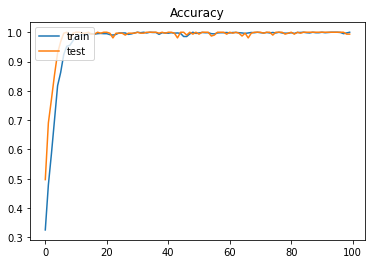

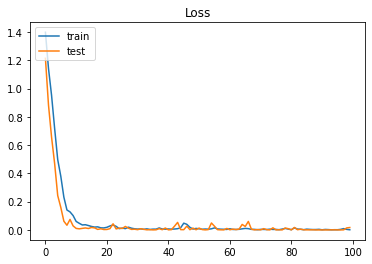

In [ ]:
import matplotlib.pyplot as plt

# モデルを評価
score = model.evaluate(X_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])

# 学習の様子をグラフへ描画 --- (*5)
# 正解率の推移をプロット
plt.plot(log.history['accuracy'])
plt.plot(log.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# ロスの推移をプロット
plt.plot(log.history['loss'])
plt.plot(log.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


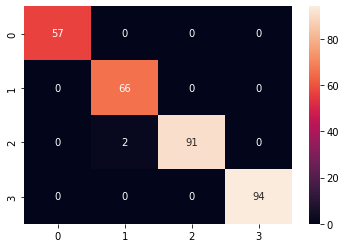

In [ ]:
y_test = np.argmax(y_test, axis=1)  # 正解ラベル.one_hotから変換
pred = np.argmax(model.predict(X_test), axis=1)   # モデルの予測
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm,  annot=True, fmt='d')  # annotでセルに値を表示, fmt='d'で整数表示
plt.show()

In [ ]:
#学習済みモデルの保存
model.save_weights('model_VGG.h5')

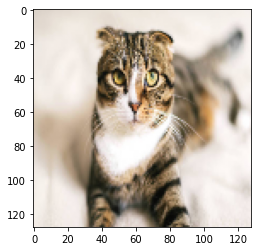

1/1 [==============================] - 0s 381ms/step
American_shorthair  =  0.0
Munchikin  =  0.0
Persian  =  0.0
Scottish_fold  =  1.0
--
予測結果= Scottish_fold
------------------------
------------------------


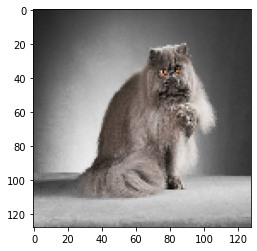

1/1 [==============================] - 0s 26ms/step
American_shorthair  =  0.0
Munchikin  =  0.0
Persian  =  1.0
Scottish_fold  =  6.4150506e-29
--
予測結果= Persian
------------------------
------------------------


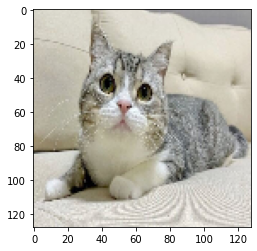

1/1 [==============================] - 0s 21ms/step
American_shorthair  =  1.0
Munchikin  =  0.0
Persian  =  0.0
Scottish_fold  =  0.0
--
予測結果= American_shorthair
------------------------
------------------------


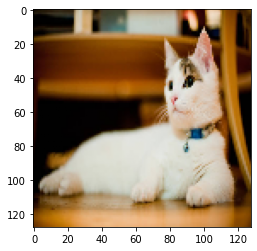

1/1 [==============================] - 0s 23ms/step
American_shorthair  =  0.0
Munchikin  =  1.0
Persian  =  0.0
Scottish_fold  =  0.0
--
予測結果= Munchikin
------------------------
------------------------


In [ ]:
# val画像で精度検証
import cv2
import numpy as np
import glob

im_size = 128 * 128

model.load_weights('model_VGG.h5')
files = glob.glob("/content/val/*")

for img in files:
  im = cv2.imread(img)
  im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
  im = cv2.resize(im,(128,128))
  plt.imshow(im/255)
  plt.show()
  result = model.predict(np.array([im]),batch_size = 32,verbose=1)
  label_list = ["American_shorthair","Munchikin","Persian","Scottish_fold"]
  for i in range(4):
    print(label_list[i]," = ", result[0][i])
  print("--")
  print("予測結果=", label_list[result.argmax()])
  print("------------------------\n------------------------")